In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 1数据集有多少条

In [2]:
df = pd.read_csv('train_new.csv',index_col = 'Unnamed: 0')
df.shape[0]
#df.head()

891

## 2打印出票价最贵的那条数据

In [3]:

df.Fare = df.Fare.apply(lambda x:float(x[1:]))


In [4]:
df.sort_values('Fare',ascending = False).head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


## 3初步感受数据

In [5]:
df.head()    #数据集有891行13列

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4试概述此数据集

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


## 5有没有不可以分析的列?试说明原因.如果有,请删除这一列


  ###            Cabin这一列可以不分析，因为NaN值太多

In [7]:
df.drop(columns = ['Cabin'],inplace=True)


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 6有没有名字叫jack的人?

In [9]:
'jack' in df.Name.values

False

In [10]:
df[df.Name == 'jack']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


###  没有名字叫jack的人


## 7人员存活率和登录港口是否有关系

In [11]:
data1 = df.loc[:,['Survived','Embarked']]
data1.head()

,Survived,Embarked
0,0,S
1,1,C
2,1,S
3,1,S
4,0,S


In [12]:
Embarked_data = df.groupby('Embarked').size()

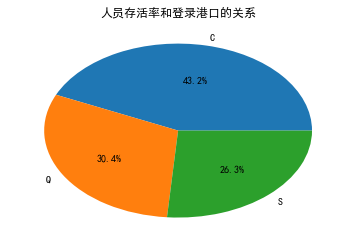

In [13]:
data1_1 = data1[data1.Survived == 1]
huo_data = data1_1.groupby('Embarked').size()
plt.title('人员存活率和登录港口的关系')
lu = huo_data/Embarked_data*100
plt.pie(lu,autopct='%1.1f%%',labels = lu.index)
plt.show()

## 8人员存活率和年龄是否有关系

In [14]:
data2 = df.loc[:,['Survived','Age']]
data2.Age = data2.Age.fillna(20)

In [15]:
data2.shape[0]

891

In [16]:
a = data2[data2.Survived == 1]
a.head()
len(a[a.Age<=18]) /891*100      #年龄小于等于18岁的存活率

7.856341189674524

In [17]:
len(a[(a.Age>18) & (a.Age<40)])/891*100   #年龄大于18 小于40的存活率

23.681257014590347

In [18]:
len(a[a.Age>=40])/891*100    #年龄大于等于40的存活率

6.846240179573512

## 9人员存活率和性别是否有关系

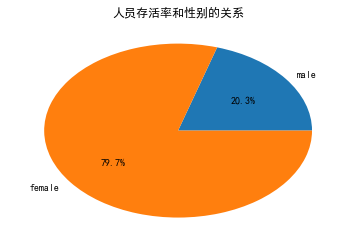

In [68]:
data3 = df.loc[:,['Survived','Sex']]
data_1 = data3[data3.Survived == 1]
df_1 = data_1.groupby('Sex').size()
d = df_1.sort_values(ascending = True)/data3.Sex.value_counts()*100
plt.title('人员存活率和性别的关系')
plt.pie(d,autopct='%1.1f%%',labels = d.index)
plt.show()

In [64]:
data3.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [67]:
df_1.sort_values(ascending = True)

Sex
male      109
female    233
dtype: int64

In [69]:
d
#data3.head()

Sex
male      18.890815
female    74.203822
dtype: float64

In [21]:
#data3.Sex.value_counts()

In [22]:
#len(data3[(data3.Survived == 1)&(data3.Sex == 'male')])/577  #男性存活率

In [23]:
#len(data3[(data3.Survived == 1)&(data3.Sex == 'female')])/314 #女性存活率

In [24]:
#plt.bar()

####  女士优先的原则，所以女士存活率高

## 10人员存活和旅客类型是否有关系?

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
#df[df.Survived == 1]

In [27]:
data4 = df.loc[:,['Survived','Pclass']]
data4.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


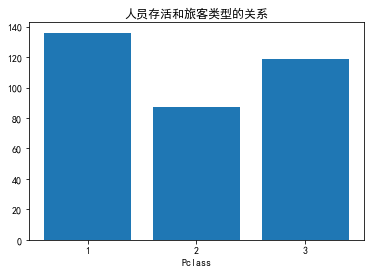

In [28]:
num = data4[data4.Survived == 1]
huo_list = []
for i in data4.Pclass.value_counts().index:
    huo_list.append(len(num[num.Pclass == i]))
huo_list
plt.title('人员存活和旅客类型的关系')
plt.xticks(data4.Pclass.value_counts().index)
plt.xlabel('Pclass')
plt.bar(data4.Pclass.value_counts().index,huo_list)
plt.show()

In [29]:
#data4.Pclass.value_counts().index


In [30]:
#data4[(data4.Survived ==1)&data4.Pclass == 2]

In [31]:
#plt.hist(data4.Pclass.value_counts().index,huo_list)

## 11船上的人性别比例如何?试画图说明

In [32]:
Sex_data = df.groupby('Sex').size()
Sex_data


Sex
female    314
male      577
dtype: int64

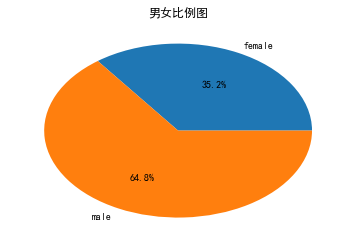

In [33]:
plt.title('男女比例图')
Sex_data.apply(lambda x:x/len(df.Sex)*100)
plt.pie(Sex_data,autopct='%1.1f%%',labels = Sex_data.index)
plt.show()

## 12 画出票价的散点图,散点图的颜色用性别区分,散点的大小和票价面值成正比

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


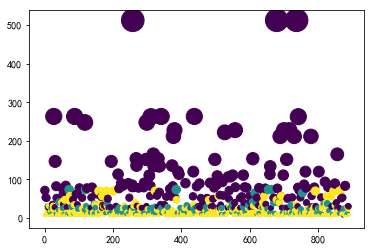

In [35]:
#fare_data = df.groupby('Fare').size()

plt.scatter(df.PassengerId.index,df.Fare,s = df.Fare,c = df.Pclass)

## 13(此题和前边的题不影响)有人质疑说,妇女儿童生存率高是因为他们更多地在头等舱,这种说法你怎么看,试给出证据


In [49]:
#pd.cut(df.Age,5)
df1 = pd.read_csv('train_new.csv',index_col = 'Unnamed: 0')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


In [60]:
data_7 = df1.loc[:,['Sex','Age','Cabin']]
data_7.Age = data_7.Age.fillna(20)

In [61]:
nan_data = data_7[df.Age<=16][df.Sex == 'male']

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [62]:
nv_data = data_7[data_7.Sex == 'female']

In [63]:
nv_data

,Sex,Age,Cabin
1,female,38.0,C85
2,female,26.0,NaN
3,female,35.0,C123
8,female,27.0,NaN
9,female,14.0,NaN
10,female,4.0,G6
11,female,58.0,C103
14,female,14.0,NaN
15,female,55.0,NaN
18,female,31.0,NaN


## 其他你想自己分析的问题.

### 不是一个人上传的有那些

In [40]:
sib_data = df.SibSp.value_counts().drop(0)

<function matplotlib.pyplot.show(*args, **kw)>

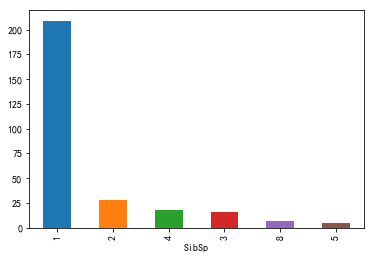

In [43]:
sib_data.plot('bar')
plt.xlabel('SibSp')
plt.show